## Problem Statement

This is the problem of a Shinkansen (Bullet-Trains) of Japan. They aim to determine the relative importance of each parameter with regards to their contribution to the passenger travel experience. Provided is a random sample of individuals who travelled using their train. The on-time performance of the trains along with the passenger’s information is published in the CSV file named ‘Traveldata_train’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report CSV labelled ‘Surveydata_train’.

In the survey, a passenger was explicitly asked whether they were delighted with their overall travel experience and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’. 

The objective of this exercise is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing Travel data and Survey data of passengers. Both the test data and the train data are collected at the same time and belongs to the same company.

### Goal:
The goal of the problem is to predict whether a passenger was delighted considering his/her overall travel experience of traveling in Shinkansen (Bullet Train). For each passenger id in the test set, you must predict the “Overall_Experience” level.

In [888]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [889]:
Travel_dataset_train = pd.read_csv('Traveldata_train.csv')
Travel_dataset_test = pd.read_csv('Traveldata_test.csv')
Survey_dataset_train = pd.read_csv('Surveydata_train.csv')
Survey_dataset_test = pd.read_csv('Surveydata_test.csv')

### Travel Train data

In [890]:
Travel_dataset_train.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [891]:
Travel_train= Travel_dataset_train.set_index('ID')
Travel_train.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
ID,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


### Survey Train data

In [892]:
Survey_dataset_train.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [893]:
Survey_train=Survey_dataset_train.set_index('ID')
Survey_train.head()

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,
98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


### Travel Test data

In [894]:
Travel_dataset_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


### Survey Test data

In [895]:
Survey_dataset_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


## Join the two sets from both train and test

### Train dataset

In [944]:
df_train = pd.concat([Travel_train, Survey_train],axis=1)
df_train.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,need improvement,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,poor,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,need improvement,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,acceptable,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,acceptable,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [897]:
#save to a csv file
df_train.to_csv(r'C:\Users\91950\Desktop\HACKATHON\New folder\df_train.csv', index=True)

### Test dataset

In [898]:
Travel_test=Travel_dataset_test.set_index('ID')
Survey_test=Survey_dataset_test.set_index('ID')

In [899]:
df_test = pd.concat([Travel_test, Survey_test],axis=1)
df_test.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,Green Car,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,Ordinary,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,Green Car,...,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [900]:
df_test_save = df_test.reset_index()
df_test_save.head(3)

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent


In [901]:
#save to a csv file
df_test_save.to_csv(r'C:\Users\91950\Desktop\HACKATHON\New folder\df_test-new.csv', index=True)

### --------------

In [902]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   CustomerType             85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   TypeTravel               85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   DepartureDelay_in_Mins   94322 non-null  float64
 7   ArrivalDelay_in_Mins     94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_time_convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_location        94349 non-null  object 
 14  Onboardwifi_

In [903]:
df_train.describe()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience
count,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,39.419647,1978.888185,14.647092,15.005222,0.546658
std,15.116632,1027.961019,38.138781,38.439409,0.497821
min,7.000000,50.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,51.000000,2538.000000,12.000000,13.000000,1.000000
max,85.000000,6951.000000,1592.000000,1584.000000,1.000000


In [904]:
df_train.select_dtypes(include=object).columns.tolist()

['Gender',
 'CustomerType',
 'TypeTravel',
 'Travel_Class',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [905]:
df_train[['Seat_comfort',
 'Arrival_time_convenient',
 'Catering',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']].apply(pd.Series.value_counts)

,Seat_comfort,Arrival_time_convenient,Catering,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
acceptable,21158,15177,18468,20118,17560,15702,16390,18071,16384,17767.0,25803,17449,22475
excellent,12971,17684,13455,20968,21644,25894,24744,21272,24832,26003.0,19641,26053,21742
extremely poor,3463,4332,3910,91,2144,1,16,4,340,NaN,1,5,12
good,20595,19574,17969,22835,30446,30016,28909,27265,28870,34944.0,26502,35427,25533
need improvement,20946,14990,17978,19596,13926,12508,14479,11390,15753,9759.0,11218,9806,13451
poor,15185,13692,13858,10741,8641,10167,9768,8776,8110,5764.0,11137,5633,11160


In [908]:
df_train['Gender'].value_counts()

Female    47815
Male      46487
Name: Gender, dtype: int64

In [906]:
df_train['Seat_Class'].value_counts()

Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64

In [907]:
df_train['Platform_location'].value_counts()

manageable           24173
Convinient           21912
need improvement     17832
Inconvinient         16449
very convinient      13981
very inconvinient        2
Name: Platform_location, dtype: int64

### ----------

### Duplicate Values Treatment

In [945]:
df_train.duplicated().sum()

27

In [946]:
df_train.drop_duplicates(inplace=True)

In [947]:
df_train.duplicated().sum()

0

In [914]:
df_test.duplicated().sum()

2

In [915]:
duplicate = df_test[df_test.duplicated()]
duplicate

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
99901393,Male,Loyal Customer,27.0,NaN,Eco,1236,1.0,0.0,need improvement,Ordinary,...,good,need improvement,good,good,good,excellent,good,excellent,excellent,good
99930781,Female,NaN,67.0,Personal Travel,Eco,2492,9.0,0.0,acceptable,Green Car,...,excellent,excellent,excellent,good,NaN,good,good,acceptable,good,good


In [916]:
df_test.drop_duplicates(inplace=True)

In [917]:
df_test.duplicated().sum()

0

#### All the duplicate values are removed. Now lets encode the categorical data without taking NaN values in consideration

### ----------------

### Outlier treatment

Shape before Outliers Treatment (94352, 24)


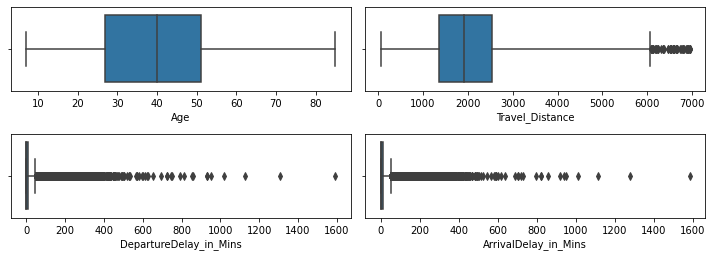

In [948]:
data_plot=df_train[['Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']]
fig=plt.figure(figsize=(10,5))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]], whis=3)
    plt.tight_layout()
print('Shape before Outliers Treatment',df_train.shape)

In [949]:
Q1 = data_plot.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = data_plot.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [950]:
lower_range

Age                        -9.0
Travel_Distance          -409.5
DepartureDelay_in_Mins    -18.0
ArrivalDelay_in_Mins      -19.5
dtype: float64

In [951]:
upper_range

Age                         87.0
Travel_Distance           4306.5
DepartureDelay_in_Mins      30.0
ArrivalDelay_in_Mins        32.5
dtype: float64

In [952]:
df_outlier_treatment=df_train

In [953]:
df_outlier_treatment['Age']=np.where(df_outlier_treatment['Age']> 87,87,df_outlier_treatment['Age'])

df_outlier_treatment['Travel_Distance']=np.where(df_outlier_treatment['Travel_Distance']> 4306.5,4306.5,df_outlier_treatment['Travel_Distance'])

df_outlier_treatment['DepartureDelay_in_Mins']=np.where(df_outlier_treatment['DepartureDelay_in_Mins']> 30,30,df_outlier_treatment['DepartureDelay_in_Mins'])

df_outlier_treatment['ArrivalDelay_in_Mins']=np.where(df_outlier_treatment['ArrivalDelay_in_Mins']> 32.5,32.5,df_outlier_treatment['ArrivalDelay_in_Mins'])

Shape before Outliers Treatment (94352, 24)


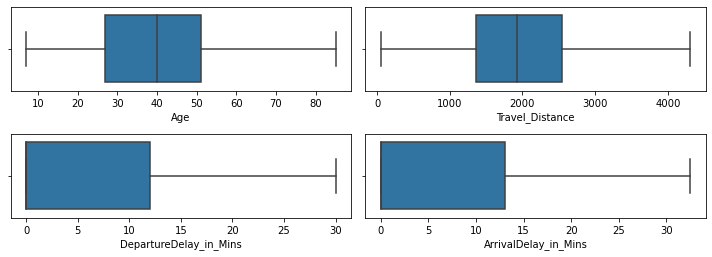

In [954]:
data_plot2=df_outlier_treatment[['Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']]
fig=plt.figure(figsize=(10,5))
for i in range(0,len(data_plot2.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot2[data_plot.columns[i]], whis=3)
    plt.tight_layout()
print('Shape before Outliers Treatment',df_outlier_treatment.shape)

In [955]:
df_outlier_treatment.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272.0,0.0,5.0,0,need improvement,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200.0,9.0,0.0,0,poor,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061.0,30.0,32.5,1,need improvement,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
98800004,Female,Loyal Customer,44.0,Business travel,Business,780.0,13.0,18.0,0,acceptable,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981.0,0.0,0.0,1,acceptable,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [956]:
df_train_treated=df_outlier_treatment

## -----------------

## Hot Label encoding and Imputation

In [957]:
df_train_treated.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272.0,0.0,5.0,0,need improvement,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200.0,9.0,0.0,0,poor,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061.0,30.0,32.5,1,need improvement,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
98800004,Female,Loyal Customer,44.0,Business travel,Business,780.0,13.0,18.0,0,acceptable,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981.0,0.0,0.0,1,acceptable,...,need improvement,good,excellent,good,good,good,good,good,good,good


### Label Encoding

In [958]:
import category_encoders as ce

In [959]:
df_train_treated.select_dtypes(include=object).columns.tolist()

['Gender',
 'CustomerType',
 'TypeTravel',
 'Travel_Class',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [960]:
# create object of Ordinalencoding

cols=['Seat_comfort','Arrival_time_convenient','Catering','Onboardwifi_service','Onboard_entertainment','Online_support','Onlinebooking_Ease','Onboard_service','Leg_room','Baggage_handling','Checkin_service','Cleanliness','Online_boarding']

In [961]:
map_dict={'extremely poor':0,'poor':1,'need improvement':2,'acceptable':3,'good':4,'excellent':5}

In [962]:
for i in cols:
    df_train_treated[i] = df_train_treated[i].map(map_dict)

In [963]:
df_train_treated.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272.0,0.0,5.0,0,2.0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200.0,9.0,0.0,0,1.0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061.0,30.0,32.5,1,2.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
98800004,Female,Loyal Customer,44.0,Business travel,Business,780.0,13.0,18.0,0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981.0,0.0,0.0,1,3.0,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [964]:
encode2 = {'Gender': {'Male': 1, 'Female': 0}, 
           'CustomerType': {'Loyal Customer': 1, 'disloyal Customer': 0}, 
           'TypeTravel':{'Business travel':1, 'Personal Travel':0},
          'Travel_Class':{'Business':1,'Eco':0},
          'Seat_Class':{'Green Car':1, 'Ordinary':0},
          'Platform_location':{'very inconvinient':0, 'Inconvinient':1, 'need improvement':2, 'manageable':3, 'Convinient':4, 'very convinient':5}}

df_encode_train= df_train_treated.replace(encode2)
df_encode_train.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.0,52.0,NaN,1,272.0,0.0,5.0,0,2.0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
98800002,1.0,1.0,48.0,0.0,0,2200.0,9.0,0.0,0,1.0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
98800003,0.0,1.0,43.0,1.0,1,1061.0,30.0,32.5,1,2.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
98800004,0.0,1.0,44.0,1.0,1,780.0,13.0,18.0,0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
98800005,0.0,1.0,50.0,1.0,1,1981.0,0.0,0.0,1,3.0,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [965]:
# convert back to df_train
df_train_encoded=df_encode_train

In [709]:
df_encode_train.to_csv(r'C:\Users\91950\Desktop\HACKATHON\New folder\encode_train.csv', index=True)

In [710]:
#check if anything left from encoding

df_encode_train.select_dtypes(include=object).columns.tolist()

[]

### Imputation of NaN values

In [966]:
df_train_encoded.isnull().sum()

Gender                       77
CustomerType               8949
Age                          33
TypeTravel                 9220
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8928
Catering                   8740
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7599
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [967]:
df_train_encoded.isnull().sum()/df_train.isnull().sum().sum()*100

Gender                      0.172708
CustomerType               20.072223
Age                         0.074018
TypeTravel                 20.680065
Travel_Class                0.000000
Travel_Distance             0.000000
DepartureDelay_in_Mins      0.127849
ArrivalDelay_in_Mins        0.800736
Overall_Experience          0.000000
Seat_comfort                0.136820
Seat_Class                  0.000000
Arrival_time_convenient    20.025121
Catering                   19.603445
Platform_location           0.067289
Onboardwifi_service         0.067289
Onboard_entertainment       0.040373
Online_support              0.204109
Onlinebooking_Ease          0.163736
Onboard_service            17.044231
Leg_room                    0.201866
Baggage_handling            0.318500
Checkin_service             0.172708
Cleanliness                 0.013458
Online_boarding             0.013458
dtype: float64

### Imputation based on Mean and Mode

In [968]:
missing_col= ['Gender',
 'CustomerType',
 'Age',
 'TypeTravel',
 'Seat_comfort',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding',
 'DepartureDelay_in_Mins','ArrivalDelay_in_Mins']

In [969]:
for i in missing_col:
    df_train_encoded.loc[df_train_encoded[i].isnull() == True,i] = df_train_encoded[i].mode()[0]

In [971]:
df_train_encoded.isnull().sum()

Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [973]:
df_train_imputed = df_train_encoded

In [974]:
df_train_imputed.to_csv(r'C:\Users\91950\Desktop\HACKATHON\New folder\train_imputed.csv', index=True)

### ----------------

### Correlation

In [975]:
## Correlation observation
#pairplot

## Lets find the correlation
df_Corr =df_train_imputed.corr(method ='pearson')
df_Corr

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
Gender,1.000000,0.027849,0.005055,-0.011194,0.009254,0.129996,0.002708,0.001136,-0.214188,-0.072015,...,-0.032073,-0.142082,-0.091188,-0.083022,-0.055518,-0.071594,-0.014835,-0.016113,-0.015898,-0.047114
CustomerType,0.027849,1.000000,0.265168,-0.270186,0.078733,-0.024386,-0.007193,-0.010928,0.274774,0.035798,...,0.070742,0.218251,0.174095,0.142759,0.075893,0.091677,-0.001746,0.038862,0.001992,0.101925
Age,0.005055,0.265168,1.000000,0.040123,0.136779,-0.252926,-0.008136,-0.011728,0.116231,0.007957,...,0.011575,0.131580,0.117312,0.068885,0.060755,0.082747,-0.018011,0.028727,-0.018399,0.035552
TypeTravel,-0.011194,-0.270186,0.040123,1.000000,0.512947,0.111969,0.008346,0.010067,0.100811,-0.013579,...,0.014330,0.074607,0.031997,0.021950,-0.034918,-0.011430,-0.046246,-0.054439,-0.055370,0.004856
Travel_Class,0.009254,0.078733,0.136779,0.512947,1.000000,0.160283,-0.007986,-0.019263,0.310024,-0.032600,...,0.061257,0.247798,0.182746,0.132362,0.158390,0.132127,0.128938,0.139814,0.123428,0.100741
Travel_Distance,0.129996,-0.024386,-0.252926,0.111969,0.160283,1.000000,0.047930,0.043428,-0.045483,-0.045779,...,0.007794,-0.030888,-0.034845,-0.024396,-0.032106,-0.029837,0.019704,0.002929,0.008879,0.004281
DepartureDelay_in_Mins,0.002708,-0.007193,-0.008136,0.008346,-0.007986,0.047930,1.000000,0.836447,-0.081009,-0.028754,...,-0.028098,-0.035031,-0.027935,-0.036865,-0.032585,-0.012162,-0.022086,-0.026663,-0.045175,-0.025561
ArrivalDelay_in_Mins,0.001136,-0.010928,-0.011728,0.010067,-0.019263,0.043428,0.836447,1.000000,-0.101648,-0.033236,...,-0.035232,-0.045305,-0.038107,-0.047975,-0.044227,-0.022761,-0.035562,-0.036852,-0.060053,-0.035429
Overall_Experience,-0.214188,0.274774,0.116231,0.100811,0.310024,-0.045483,-0.081009,-0.101648,1.000000,0.243263,...,0.229651,0.524725,0.391883,0.432113,0.334387,0.302397,0.257665,0.262506,0.255659,0.339148
Seat_comfort,-0.072015,0.035798,0.007957,-0.013579,-0.032600,-0.045779,-0.028754,-0.033236,0.243263,1.000000,...,0.127778,0.425327,0.117956,0.209743,0.119383,0.136589,0.118272,0.041223,0.108182,0.128661


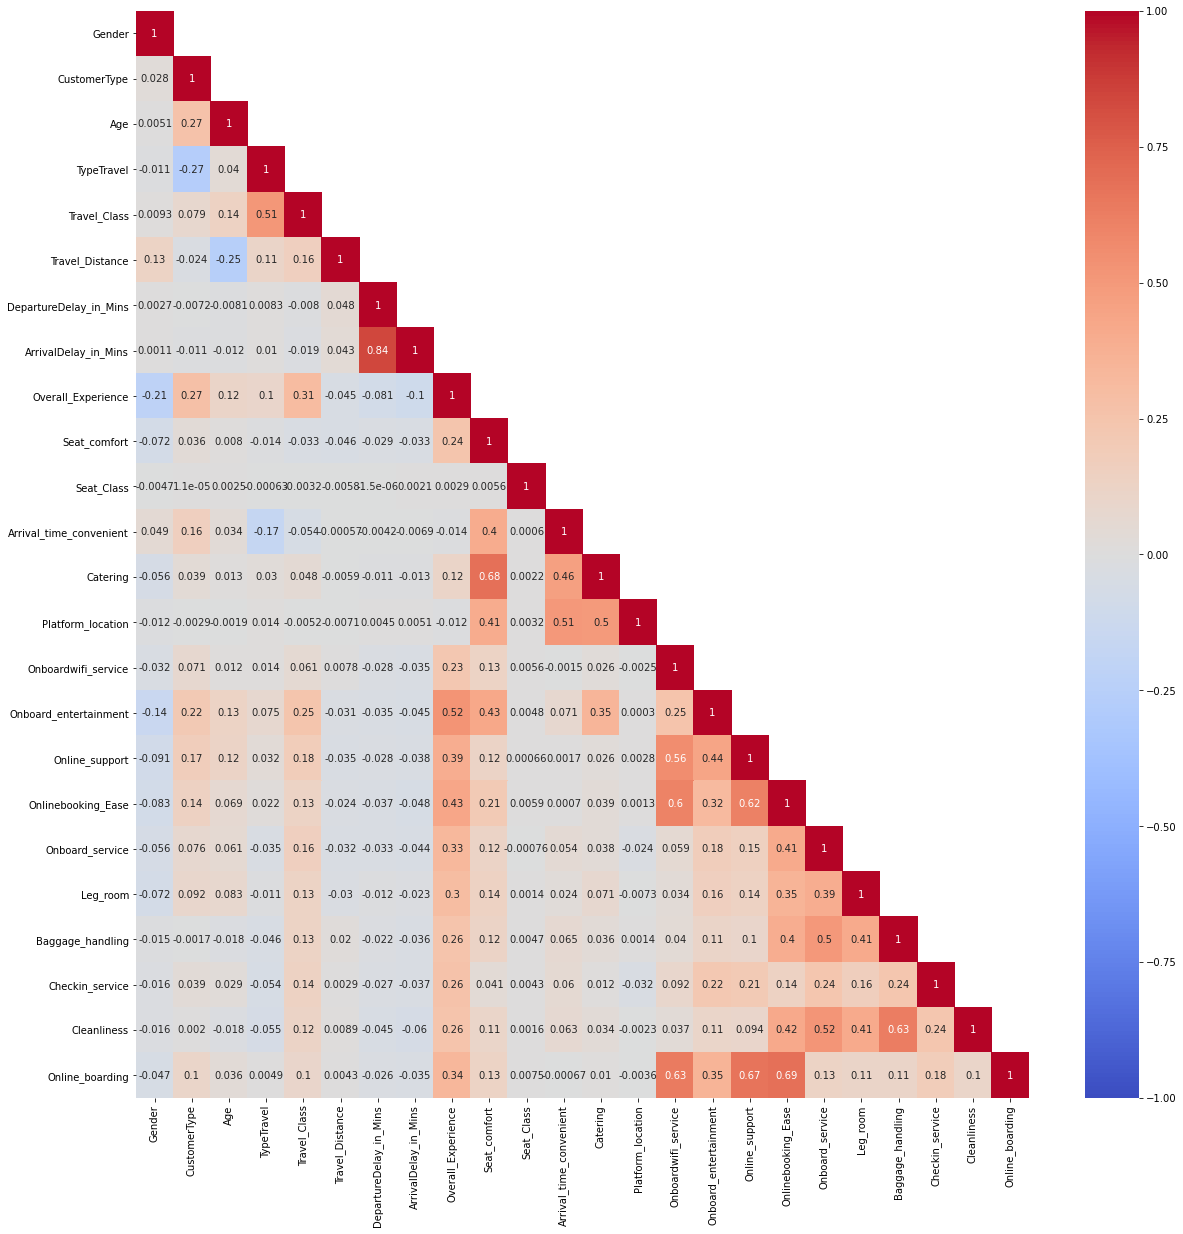

In [976]:
## Correlation Matrix
plt.figure(figsize=(20 ,20))
mask = np.array(df_Corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_Corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

Seat Comfort vs seat comfort, online support vs onboard wifi, online booking ease vs onboard wifi, online boarding vs online support, online booking vs online boarding, cleanliness vs baggage handling
These are import co relation which impact the overall experience

## Principal Component Analysis

### 1. Bartlett Test of Sphericity

In [977]:
#pip install factor-analyzer

In [978]:
## Null hypothesis =  All the dimensions are equal
## Alternate hypothesis  =  atleast one dimension is not equal or there is a difference in the dimensions

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_train_imputed)
chi_square_value, p_value

(817843.012685964, 0.0)

Null Hypothesis fails. Hence as per the alternate hypothesis we can go for the dimensionality reduction

### 2. Kaiser-Meyer-Olkin (KMO) Test

In [979]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_train_imputed)
print(kmo_all,kmo_model)

[0.63029004 0.5277521  0.57637807 0.46584327 0.60625575 0.51473123
 0.50766135 0.51073931 0.85324537 0.74241236 0.5512801  0.75280349
 0.72699117 0.71878444 0.84644638 0.79257377 0.86934356 0.78673969
 0.87562569 0.90117259 0.82583658 0.77035469 0.80270711 0.83040479] 0.7478830046449427


In [980]:
cols_list= df_train_imputed.columns.tolist()
cols_list
table_KMO = pd.DataFrame(cols_list)
table_KMO_values=pd.DataFrame(kmo_all)
KMO_result = pd.concat([table_KMO, table_KMO_values],axis=1)
KMO_result

,0,0
0,Gender,0.630290
1,CustomerType,0.527752
2,Age,0.576378
3,TypeTravel,0.465843
4,Travel_Class,0.606256
5,Travel_Distance,0.514731
6,DepartureDelay_in_Mins,0.507661
7,ArrivalDelay_in_Mins,0.510739
8,Overall_Experience,0.853245
9,Seat_comfort,0.742412


In [981]:
KMO_result.columns = ['features','KMO_value']
KMO_result.sort_values(by=['KMO_value'])

,features,KMO_value
3,TypeTravel,0.465843
6,DepartureDelay_in_Mins,0.507661
7,ArrivalDelay_in_Mins,0.510739
5,Travel_Distance,0.514731
1,CustomerType,0.527752
10,Seat_Class,0.551280
2,Age,0.576378
4,Travel_Class,0.606256
0,Gender,0.630290
13,Platform_location,0.718784


Note: KMO values range between 0 and 1. Value of KMO less than 0.5 is considered inadequate.

Kaiser put the following values on the results:

0.00 to 0.49 unacceptable.

0.50 to 0.59 miserable.

0.60 to 0.69 mediocre.

0.70 to 0.79 middling.

0.80 to 0.89 meritorious.

0.90 to 1.00 marvelous.

## Splitting training dataset into train and validation set

In [982]:
X = df_train_imputed.drop(['Overall_Experience'],axis = 1)
y = df_train_imputed['Overall_Experience']

In [983]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.feature_selection import chi2

### Model1. Model training -using- Decision Tree

In [741]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)
dt_model.fit(X_train,y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_val = dt_model.predict(X_validation)

In [742]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_pred_train)
dt_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print("Train Accuracy:",dt_acc_train)
print("Validation Accuracy:",dt_acc_val)
print()

dt_roc_train = metrics.roc_auc_score(y_train,y_pred_train)
dt_roc_val = metrics.roc_auc_score(y_validation,y_pred_val)
print("Train ROC AUC score:",dt_roc_train)
print("Validation ROC AUC score:",dt_roc_val)
print()

dt_clr_train = metrics.classification_report(y_train,y_pred_train)
dt_clr_val = metrics.classification_report(y_validation,y_pred_val)
print("Train Classification Report:\n",dt_clr_train)
print("Validation Classification Report:\n",dt_clr_val)

Train Accuracy: 0.9353479683628992
Validation Accuracy: 0.9285676434741137

Train ROC AUC score: 0.9351020863468108
Validation ROC AUC score: 0.9279629094443412

Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     34166
           1       0.94      0.94      0.94     41315

    accuracy                           0.94     75481
   macro avg       0.93      0.94      0.93     75481
weighted avg       0.94      0.94      0.94     75481

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      8605
           1       0.93      0.93      0.93     10266

    accuracy                           0.93     18871
   macro avg       0.93      0.93      0.93     18871
weighted avg       0.93      0.93      0.93     18871



### Model2. Model training -using- Random Forest

In [743]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=10,random_state=0)
rf_model.fit(X_train,y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_validation)

In [744]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_pred_train)
dt_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print("Train Accuracy:",dt_acc_train)
print("Validation Accuracy:",dt_acc_val)
print()

dt_roc_train = metrics.roc_auc_score(y_train,y_pred_train)
dt_roc_val = metrics.roc_auc_score(y_validation,y_pred_val)
print("Train ROC AUC score:",dt_roc_train)
print("Validation ROC AUC score:",dt_roc_val)
print()

dt_clr_train = metrics.classification_report(y_train,y_pred_train)
dt_clr_val = metrics.classification_report(y_validation,y_pred_val)
print("Train Classification Report:\n",dt_clr_train)
print("Validation Classification Report:\n",dt_clr_val)

Train Accuracy: 0.930114863343093
Validation Accuracy: 0.9251232049175985

Train ROC AUC score: 0.9289517714371438
Validation ROC AUC score: 0.9239792071287257

Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     34166
           1       0.93      0.94      0.94     41315

    accuracy                           0.93     75481
   macro avg       0.93      0.93      0.93     75481
weighted avg       0.93      0.93      0.93     75481

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      8605
           1       0.93      0.94      0.93     10266

    accuracy                           0.93     18871
   macro avg       0.92      0.92      0.92     18871
weighted avg       0.93      0.93      0.93     18871



### Model3. Model training -using- Gradient Boosting

In [810]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [822]:
import xgboost as xgb

In [830]:
xg_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [831]:
xg_model.fit(X_train,y_train)

y_pred_train = xg_model.predict(X_train)
y_pred_val = xg_model.predict(X_validation)

[12:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [832]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_pred_train)
dt_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print("Train Accuracy:",dt_acc_train)
print("Validation Accuracy:",dt_acc_val)
print()

dt_roc_train = metrics.roc_auc_score(y_train,y_pred_train)
dt_roc_val = metrics.roc_auc_score(y_validation,y_pred_val)
print("Train ROC AUC score:",dt_roc_train)
print("Validation ROC AUC score:",dt_roc_val)
print()

dt_clr_train = metrics.classification_report(y_train,y_pred_train)
dt_clr_val = metrics.classification_report(y_validation,y_pred_val)
print("Train Classification Report:\n",dt_clr_train)
print("Validation Classification Report:\n",dt_clr_val)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [827]:
## Train Xgboost with Early Stopping

xg_model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
xg_model.fit(X_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [828]:
y_pred_train = xg_model.predict(X_train)
y_pred_val = xg_model.predict(X_validation)

### preparing test data for final prediction

In [759]:
df_test.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,Green Car,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,Ordinary,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,Green Car,...,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [760]:
#encoding of test dataset

for i in cols:
    df_test[i] = df_test[i].map(map_dict)

In [761]:
df_encode_test= df_test.replace(encode2)
df_encode_test.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
99900001,0.0,NaN,36.0,1.0,1,532,0.0,0.0,3.0,1,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
99900002,0.0,0.0,21.0,1.0,1,1425,9.0,28.0,0.0,0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
99900003,1.0,1.0,60.0,1.0,1,2832,0.0,0.0,5.0,0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
99900004,0.0,1.0,29.0,0.0,0,1352,0.0,0.0,3.0,1,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
99900005,1.0,0.0,18.0,1.0,1,1610,17.0,0.0,5.0,0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


In [762]:
#check if anything left from encoding

df_encode_test.select_dtypes(include=object).columns.tolist()

[]

In [763]:
df_test=df_encode_test

In [764]:
#Imputation of NaN values to test dataset

df_test.isnull().sum()

Gender                       30
CustomerType               3383
Age                          11
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       29
ArrivalDelay_in_Mins        123
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [765]:
for i in missing_col:
    df_test.loc[df_test[i].isnull() == True,i] = df_test[i].mode()[0]

In [766]:
df_test.isnull().sum()

Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [767]:
df_test.to_csv(r'C:\Users\91950\Desktop\HACKATHON\New folder\encode_test_duplicate removed.csv', index=True)

## Final Prediction

### Predicting on test data using RF model

In [768]:
final_predictions = rf_model.predict(df_test)

In [769]:
final_prediction=pd.DataFrame([final_predictions]).T
final_prediction=final_prediction.rename({0:'Overall_Experience'}, axis=1)
final_prediction.head()

,Overall_Experience
0,1
1,1
2,1
3,0
4,1


In [770]:
#get original Index
index=pd.DataFrame(df_test_save['ID'])
index.head()

,ID
0,99900001
1,99900002
2,99900003
3,99900004
4,99900005


In [771]:
submission = pd.concat([index,final_prediction], axis=1)
submission.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [772]:
submission.to_csv(r'C:\Users\91950\Desktop\HACKATHON\New folder\submission1.3.csv',index = False)

### ----END----